In [1]:
#Read in the 2D spectrum
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
filename='data/z7_GND_42912_eps_all_combined.fits'
im = fits.open(filename)
image=im[0].data
#histogram = plt.hist(image_data.flatten(), 100)
plt.figure()
plt.imshow(image,vmin=-1.0e-19,vmax=1.0e-19,cmap='gray')
plt.gca().set_aspect(2.5)
plt.tight_layout(); plt.show(); plt.close()

<Figure size 640x480 with 1 Axes>

In [2]:
#Looking in ds9, I see the emission line is centered at y~18
#The images start at 1 in ds9, but 0 in Python, so I should center my extraction at 17
extraction_center=17
#The seeing was ~0.8", and the pixel scale is 0.18"/pixel
#I want to extract with a width ~ 1.5X seeing = 1.5*0.8/0.18 = 7 pixels
extraction_width=7

#Define number of rows and wavelength pixels in the image
num_rows=image.shape[0]
num_wavelengths=image.shape[1]

#Set up an array for the 1D spectrum
spec=np.zeros(num_wavelengths)

In [3]:
#Now, extract the 1D spectrum
lower=extraction_center-(extraction_width-1)/2  #Index of lower row of extraction
upper=extraction_center+(extraction_width-1)/2  #Index of upper row of extraction
#Loop over wavelengths, set the 1D spectrum to the sum of the 7 pixels surrounding the identified line's row
for i in range(num_wavelengths):
    spec[i]=np.sum(image[int(lower):int(upper),i])

In [4]:
#Now we are almost ready to plot!  But first, we need the wavelengths
#For this, we need to find the starting wavelength value and dispersion from the header
dispersion=im[0].header['CD1_1']  #Dispersion, in A/pixel
starting_lam=im[0].header['CRVAL1']  #Starting wavelength in A
lam=np.arange(num_wavelengths)*dispersion+starting_lam  #Set up wavelength array

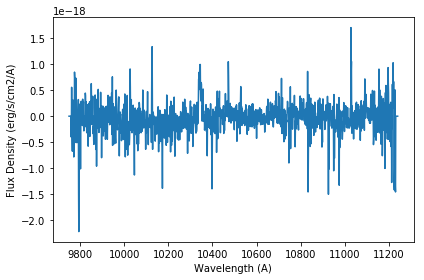

In [5]:
#Now, lets plot our spectrum, and see if we see an emission line!
plt.figure()
plt.plot(lam,spec)
plt.xlabel('Wavelength (A)')
plt.ylabel('Flux Density (erg/s/cm2/A)')
plt.tight_layout(); plt.show(); plt.close()

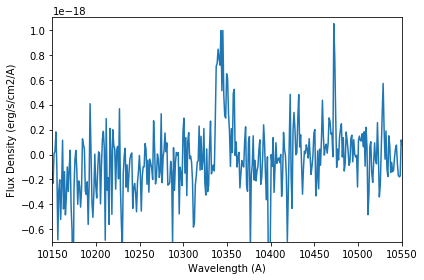

In [6]:
#There's a lot of spikes, but one looks like its got some width, lets zoom in
plt.figure()
plt.plot(lam,spec)
plt.xlabel('Wavelength (A)')
plt.ylabel('Flux Density (erg/s/cm2/A)')
plt.xlim([10150,10550])
plt.ylim([-0.7e-18,1.1e-18])
plt.tight_layout(); plt.show(); plt.close()

In [7]:
#I think we found our emission line!
#Last task - lets fit a Gaussian to the line, to measure the wavelength, so we can measure the redshift
from scipy.optimize import curve_fit

# Define model function to be used to fit to the data above:
def gauss(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

# p0 is the initial guess for the fitting coefficients (A=amplitude, mu=wavelength and sigma=sigma above)
fit,cov=curve_fit(gauss,lam,spec,p0=[1.0e-18, 10340., 3.])

# Get the fitted curve
hist_fit = gauss(lam, *fit)

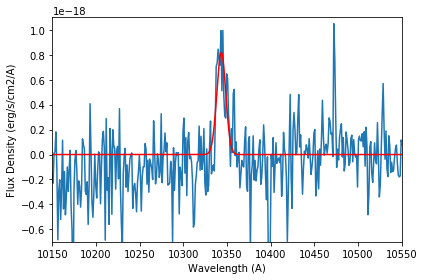

In [8]:
#Now overplot best-fit curve on data, make sure it looks good
plt.figure()
plt.plot(lam,spec)
plt.xlabel('Wavelength (A)')
plt.ylabel('Flux Density (erg/s/cm2/A)')
plt.xlim([10150,10550])
plt.ylim([-0.7e-18,1.1e-18])
plt.plot(lam, hist_fit,'red', label='Fitted data')
plt.tight_layout(); plt.show(); plt.close()

In [9]:
#Looks pretty good!  Lets see what the wavelength is
lam_fit=fit[1]  #Best-fit wavelength
lam_fit_err=np.sqrt(cov[1,1]) #Error = sqrt of diagonal element of covariance matrix
#Calculate the redshift, assuming the line is Lyman-alpha
z=lam_fit/1215.67-1.0
dz=lam_fit_err/1215.67
'You have discovered an emission line at '+str(z)+' +/-'+str(dz)

'You have discovered an emission line at 7.508338589620097 +/-0.0007850816532982892'

### Now, there are five other objects whose spectra I have given you.  One of them has an emission line about as bright as this one.  Figure out which one it is, extract it, and measure the redshift.  Show all your steps below, just like above, and end with a statement about the redshift.  When you are done, submit through Github.

The first thing we need to do is to read in a different file
There are 5 others to choose from, all formatted as data/z(7 or 8)_(GND or GNW)_(four to five-digit number)_eps_all_combined_fits. god only knows why jupyter wont display the underscores in this

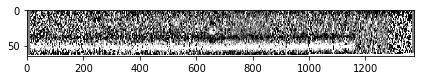

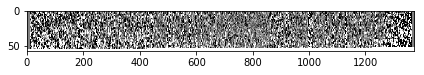

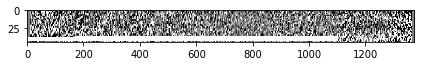

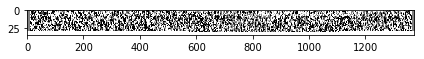

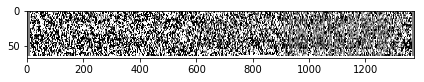

In [10]:
#FILE 2
filename2='data/z7_GND_16863_eps_all_combined.fits'
im = fits.open(filename2)
image=im[0].data

plt.figure()
plt.imshow(image,vmin=-1.0e-19,vmax=1.0e-19,cmap='gray')
plt.gca().set_aspect(2.5)
plt.tight_layout(); plt.show(); plt.close()
#wowsers what is that??? that looks like way too much noise for us to be able to accurately plot. that's probably a 
#nearby star or something

#FILE 3
filename3='data/z7_GND_18869_eps_all_combined.fits'
im = fits.open(filename3)
image=im[0].data

plt.figure()
plt.imshow(image,vmin=-1.0e-19,vmax=1.0e-19,cmap='gray')
plt.gca().set_aspect(2.5)
plt.tight_layout(); plt.show(); plt.close()
#this looks a little closer. we can try investigating this one

#FILE 4
filename4='data/z7_GND_22483_eps_all_combined.fits'
im = fits.open(filename4)
image=im[0].data

plt.figure()
plt.imshow(image,vmin=-1.0e-19,vmax=1.0e-19,cmap='gray')
plt.gca().set_aspect(2.5)
plt.tight_layout(); plt.show(); plt.close()
#this also looks kind of bad. i think i can rule it out

#FILE 5
filename5='data/z7_GNW_22375_eps_all_combined.fits'
im = fits.open(filename5)
image=im[0].data

plt.figure()
plt.imshow(image,vmin=-1.0e-19,vmax=1.0e-19,cmap='gray')
plt.gca().set_aspect(2.5)
plt.tight_layout(); plt.show(); plt.close()


#FILE 6
filename6='data/z8_GND_9408_eps_all_combined.fits'
im = fits.open(filename6)
image=im[0].data

plt.figure()
plt.imshow(image,vmin=-1.0e-19,vmax=1.0e-19,cmap='gray')
plt.gca().set_aspect(2.5)
plt.tight_layout(); plt.show(); plt.close()